In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
# import and read the csv file and create Dataframe
Path="/content/heart.csv"
df=pd.read_csv(Path)
print(df.shape)
df.head(10)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
# Check the null values in each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# check the total values in each column
df.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [ ]:
# check te no of unique values in eac column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# Identify the datatypes
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
# Generate the categorial variable lists
heart_cat=df.dtypes[df.dtypes=="object"].index.tolist()
df[heart_cat].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

After reviewing the Object datatype columns, we can safely conclude that no further binning is required as the max no of unique values is less than 5. 

In [ ]:
# Create a OneHotEncoder instance
enc=OneHotEncoder(sparse=False)

# Fit and transform 
fit_enc=enc.fit_transform(df[heart_cat])
# create a dataframe
heart_df=pd.DataFrame(fit_enc)

# adding headers to the columns using the categorial list
heart_df.columns=enc.get_feature_names(heart_cat)
print(heart_df.shape)
heart_df.head()

(918, 14)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# merging the hot encoded vfeatures and dropping the originals
df=df.merge(heart_df, left_index=True, right_index=True).drop(heart_cat, axis=1)
print(df.shape)
df.head(10)

(918, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,39,120,339,0,170,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6,45,130,237,0,170,0.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,54,110,208,0,142,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,37,140,207,0,130,1.5,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,48,120,284,0,120,0.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# checking the data for any null values and missing numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    float64
 8   Sex_M              918 non-null    float64
 9   ChestPainType_ASY  918 non-null    float64
 10  ChestPainType_ATA  918 non-null    float64
 11  ChestPainType_NAP  918 non-null    float64
 12  ChestPainType_TA   918 non-null    float64
 13  RestingECG_LVH     918 non-null    float64
 14  RestingECG_Normal  918 non-null    float64
 15  RestingECG_ST      918 non-null    float64
 16  ExerciseAngina_N   918 non

In [ ]:
# creating a corelation matrix 
corelation=df.corr()
corelation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,...,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,...,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,...,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,...,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


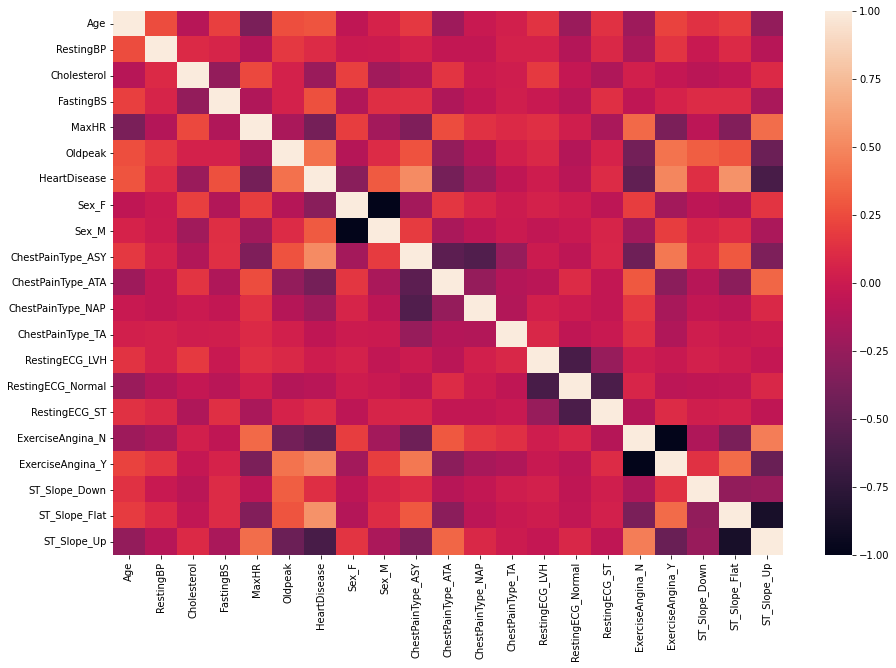

In [ ]:
# import Seaborne to create a Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corelation)


In [ ]:
# spliting the data into training and testing data
X=df.drop(["HeartDisease"],1)
y=df["HeartDisease"].copy()
print(X.shape)

(918, 20)


<ipython-input-55-c8369a9da13b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop(["HeartDisease"],1)


In [ ]:
# creating an instance for RandomForestClassifier to check feature importance
rf_model=RandomForestClassifier(n_estimators=128, random_state=42)
rf_model=rf_model.fit(X,y)

In [ ]:
# sorting the features based on their importance
importance=sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importance

[(0.14638916836866278, 'ST_Slope_Up'),
 (0.0986586099442513, 'ST_Slope_Flat'),
 (0.09855405092355378, 'Oldpeak'),
 (0.09416404480387255, 'Cholesterol'),
 (0.08909008115592841, 'MaxHR'),
 (0.07789605313493954, 'ChestPainType_ASY'),
 (0.07131157370247568, 'Age'),
 (0.06899488984229563, 'RestingBP'),
 (0.05658076279474096, 'ExerciseAngina_N'),
 (0.054077256123423706, 'ExerciseAngina_Y'),
 (0.025790001933562748, 'Sex_F'),
 (0.022033433306620286, 'FastingBS'),
 (0.02018033708569506, 'Sex_M'),
 (0.017900295257714933, 'ChestPainType_ATA'),
 (0.013980800988716346, 'RestingECG_LVH'),
 (0.012304087907864717, 'ChestPainType_NAP'),
 (0.011091784976410555, 'RestingECG_Normal'),
 (0.008415913021095962, 'RestingECG_ST'),
 (0.00683797464263075, 'ChestPainType_TA'),
 (0.00574888008554417, 'ST_Slope_Down')]

In [ ]:
# Creating a dataaframe for the feature importance
importance_df=pd.DataFrame(importance, columns=["Relevance", "Features"])
print(importance_df.shape)
importance_df.head()

(20, 2)


,Relevance,Features
0,0.146389,ST_Slope_Up
1,0.098659,ST_Slope_Flat
2,0.098554,Oldpeak
3,0.094164,Cholesterol
4,0.089090,MaxHR


In [ ]:
# choosing the columns with relevance below 1%
least_importance_df=importance_df[importance_df["Relevance"]<0.01]
least_relevant=least_importance_df["Features"].tolist()
least_relevant


['RestingECG_ST', 'ChestPainType_TA', 'ST_Slope_Down']

In [ ]:
# Dropping all columns with least relevance (leass than 1%)
X=X.drop(least_relevant, axis=1)
print(X.shape)
X.head()

(918, 17)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, stratify=y)

In [ ]:
# creating a Min Max Scaler instance
scaler=MinMaxScaler()

# fit the standard scaler
X_scaler=scaler.fit(X_train)

# Transform/Scale the data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

# Recreating an RandomForestClassiifier for training and testing on split data

In [ ]:
rf_model1=RandomForestClassifier(n_estimators=128, random_state=42)
rf_model1

RandomForestClassifier(n_estimators=128, random_state=42)

In [ ]:
# training and calculating the accuracy score
rf_model1=rf_model1.fit(X_train_scaled, y_train)

# evaluate the model
from sklearn.metrics import accuracy_score
y_pred=rf_model1.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.896


In [ ]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
# create a dataframe for confusion matrix
cm_df=pd.DataFrame(cm, index=["Actual Low Risk", "Actual High Risk"], columns=["Predicted Low Risk", "Predicted High Risk"])
cm_df

,Predicted Low Risk,Predicted High Risk
Actual Low Risk,88,15
Actual High Risk,9,118


In [ ]:
# print the imbalanced classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix")
display(cm_df)
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted Low Risk,Predicted High Risk
Actual Low Risk,88,15
Actual High Risk,9,118


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       103
           1       0.89      0.93      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



0=Low risk
1=High risk